### Conditional Statements With Combinations of Conditions
Logical operators (e.g. `and`, `or`, `not`) allow you to create conditional statements that can check for combinations of conditions. You can use:

* `and` to execute code if all specified conditions have been met
* `or` to execute code if at least one specified condition has been met
* `not` to execute code only if the specified condition has not been met (note that you can use not in combination with and or or to check whether multiple conditions are not met)

#### Check For Two Conditions Using `and`
You can check for multiple conditions by including `and` between two conditions.

Both conditions have to be satisfied in order for the code provided with the `if` statement to be executed.

This means that if one condition is not satisfied, then the conditional statement executes the code provided with `else`.

***

<code># Check that both conditions are true
if condition1 and condition2:
    print("Conditions 1 and 2 are both true.")
else:
    print("One condition (either 1 or 2) is not true.")
</code>

#### Check For At Least One Condition Using `or`
You can also write conditional statements that check whether at least one condition is true by including `or` between two conditions.

Only one condition has to pass in order for the conditional statement to execute code provided with `if`.
***

<code># Check that at least one condition is true
if condition1 or condition2:
    print("Either condition 1 or 2 is true.")
else:
    print("Neither of these conditions is true.")
</code>

Let's try using these conditional statements with multiple conditions with the for loop we used above. 
Make a copy of the for loop above where we changed elevation over 500 years.

Modify the for loop to do the following:
1. If `i` is greater than 200 `and` elevation is greater than 0.3, make a print statement stating conditions met AND reduce uplift rate by half.
2. If `i` is greater than 200 `or` elevation is greater than 0.3, make a print statement stating conditions met AND reduce uplift rate by half.

In [1]:
# simple example using "and"
import numpy as np
elevation = 0.
uplift_rate_init = 0.001   # uplift rate in units, mm/year 
dt = 50    #time step size in years
time = np.arange(0,501,dt)# time steps in years
for i in time:
    print("i = ", i)
    if i > 200 and elevation > 0.3:
        print("both conditions i > 200, elevation > 0.3 are met")
        uplift_rate = uplift_rate_init/2        
    else:
        uplift_rate = uplift_rate_init
    #print("uplift rate ", uplift_rate)
    print("elevation = ", elevation)
    print("")
    elevation += uplift_rate*dt

i =  0
elevation =  0.0

i =  50
elevation =  0.05

i =  100
elevation =  0.1

i =  150
elevation =  0.15000000000000002

i =  200
elevation =  0.2

i =  250
elevation =  0.25

i =  300
elevation =  0.3

i =  350
both conditions i > 200, elevation > 0.3 are met
elevation =  0.35

i =  400
both conditions i > 200, elevation > 0.3 are met
elevation =  0.375

i =  450
both conditions i > 200, elevation > 0.3 are met
elevation =  0.4

i =  500
both conditions i > 200, elevation > 0.3 are met
elevation =  0.42500000000000004



In [ ]:
# simple example using "or"
elevation = 0.
uplift_rate_init = 0.001   # uplift rate in units, mm/year 
dt = 50    #time step size in years
time = np.arange(0,501,dt)# time steps in years
for i in time:
    print("i = ", i)
    if i > 200 or elevation > 0.3:
        print("either condition i > 200 OR elevation > 0.3 is met")
        uplift_rate = uplift_rate_init/2        
    else:
        uplift_rate = uplift_rate_init
    #print("uplift rate ", uplift_rate)
    print("elevation = ", elevation)
    print("")
    elevation += uplift_rate*dt

### Conditional statements on arrays

Remember this important piece of information from above when we introduced `if`/`else` statements: If the condition provided with the `if` statement is satisfied (i.e. results in a value of `True`), then a certain code will execute. If that condition is not met (i.e. results in a value of `False`), then the code provided with the `else` statement will execute.

The conditional statements we've practiced above with `if`/`else` and multiple conditions with 'and', 'or', 'not' evaluate whether a statement is `True` or `False` regarding single variables, NOT arrays. We have to deal with arrays differently.

Let's look at how to evaluate conditions in arrays with the very important function `np.where()`. The documentation for `np.where()` isn't straightforward, so here's the summary: 
```
numpy.where(some_condition on an array)
```
Returns indexes in the array where `some_condition` is `True`.

Let's look at some examples. Load the long profile data from last time. Find the following indexes (locations) using `np.where()`:
1. Find where z_elev > 400.
2. Find where z_elev < 600.
3. Find where z_elev less than 300 AND greater than 200

In [11]:
fileloc = "data/"
buff_data = np.loadtxt(fileloc+"buff_long_prof.txt")
x_dist = buff_data[:,0]
z_elev = buff_data[:,1]

idx1 = np.where(z_elev>400)[0]
print(idx1)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]


In [12]:
idx2 = np.where(z_elev<200)[0]
print(idx2)

[151 152 153 154 155 156]


In [8]:
idx3 = np.where(z_elev<300 and z_elev > 200)[0]
print(idx3)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Using `and` in the code block above doesn't work because `and` evaluates if two conditions are `True`. Let's look at the two different conditions in `np.where(z_elev<300 and z_elev > 200)` individually. 

**Try This:**
Enter `z_elev<300` and `z_elev > 200` into the terminal window. The output is two arrays of `True` and `False`, but `and` only works when evaluating a single instances of `True` and `False`.

Instead of `and` or `or` to evaluate multiple conditions on numpy arrays, we use the functions `np.logical_and()` or `np.logical_or`. See examples of syntax below.

In [14]:
idx3 = np.where(np.logical_and(z_elev<300, z_elev > 200))[0]
print(idx3)

[101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150]


In [15]:
idx4 = np.where(np.logical_or(z_elev>450, z_elev < 200))[0]
print(idx4)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25 151 152 153 154 155 156]


Now let's plot this long profile data again. 
1. First plot the entire data set.
2. Next plot only the data points where z_elevation is less than 300 *and* greater than 200. 

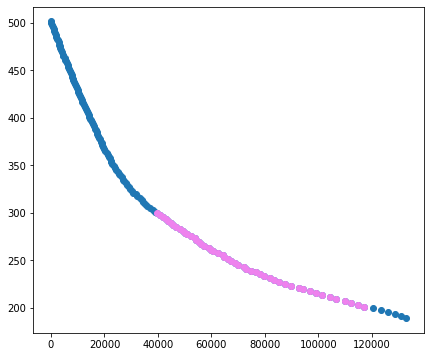

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,6))
plt.scatter(x_dist, z_elev)
plt.scatter(x_dist[idx3],z_elev[idx3], c='violet')
#plt.scatter(x_dist[idx4],z_elev[idx4], c='lightgreen')